# Network Analysis 

In [126]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

## Graphs and Networks   

A network is a graph. That is:

* A set of vertices (or nodes) joined by edges.   
* Vertices and edges can have properties (feature values).  
* Edges can have weights and be directed.

NetworkX is a library for study of the structure, dynamics, and function of complex networks.

WNetworkX can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, etc..

Library documentation: <a>https://networkx.github.io/</a>

In NetworkX, nodes can be any hashable object e.g. a text string, an image, another Graph, etc.

In [127]:
import networkx as nx

In [128]:
# Create an empty graph with no nodes and no edges.
G = nx.Graph()

## Nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions.  

In [129]:
# You can add one node at a time,
G.add_node(1)

In [130]:
# add a list of nodes
G.add_nodes_from([2, 3])

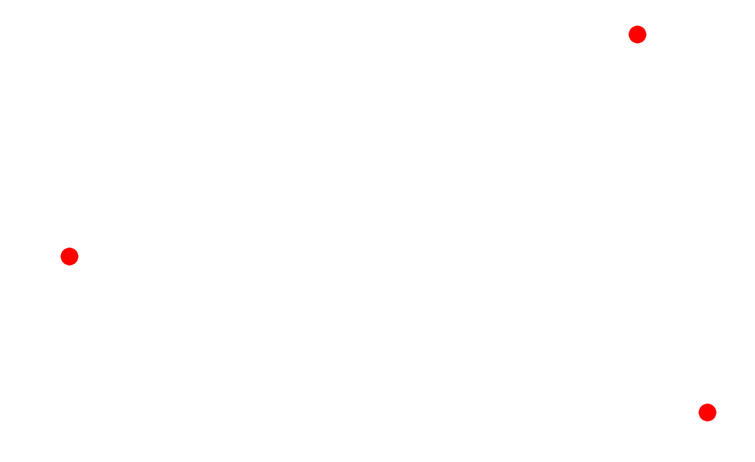

In [131]:
nx.draw(G)
plt.show()

In [132]:
#Quick snapshot of the Network
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 0
Average degree:   0.0000


## Petersen graph

In the mathematical field of graph theory, the Petersen graph is an undirected graph with 10 vertices and 15 edges. It is a small graph that serves as a useful example and counterexample for many problems in graph theory.


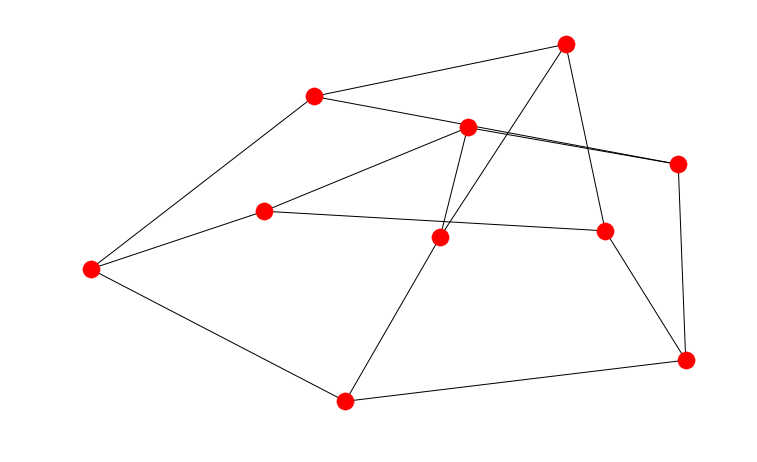

In [133]:
gp = nx.petersen_graph()
nx.draw(gp)
plt.show()

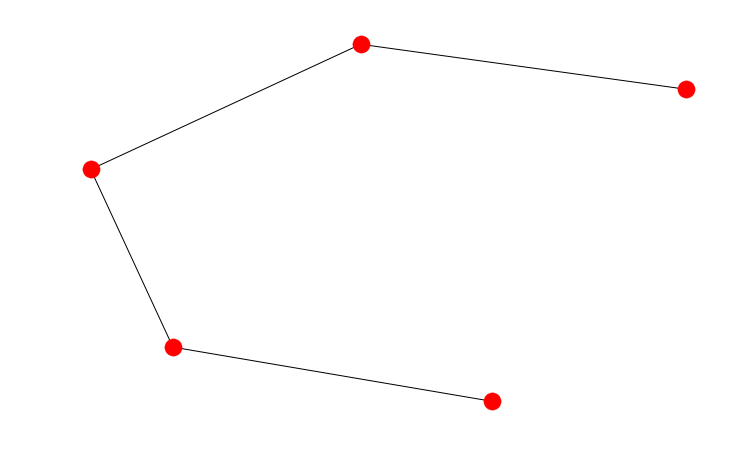

In [134]:
H = nx.path_graph(5)
nx.draw(H)
plt.show()

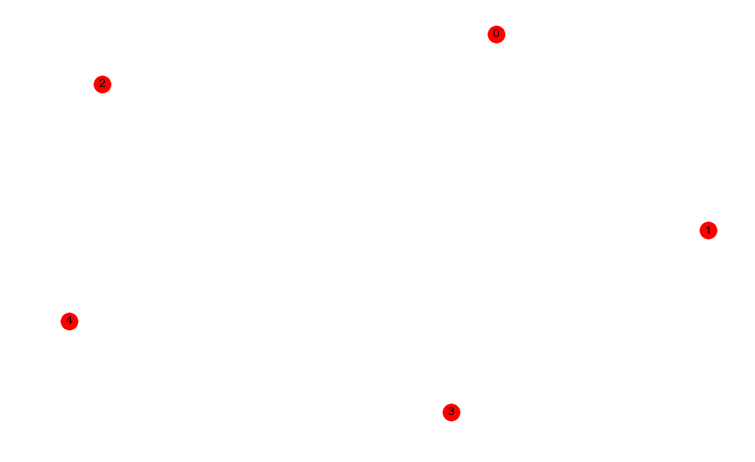

In [135]:
# Add nodes from another graph
G.add_nodes_from(H)
nx.draw(G, with_labels = True)
plt.show()

In [136]:
#Quick snapshot of the Network
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 0
Average degree:   0.0000


## Edges

In [137]:
G.add_edge(1, 2)
e = ((2, 3),(3,4))
G.add_edge(*e) # unpack edge tuple*
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 2
Average degree:   0.5714


In [138]:
G.add_edges_from(H.edges())

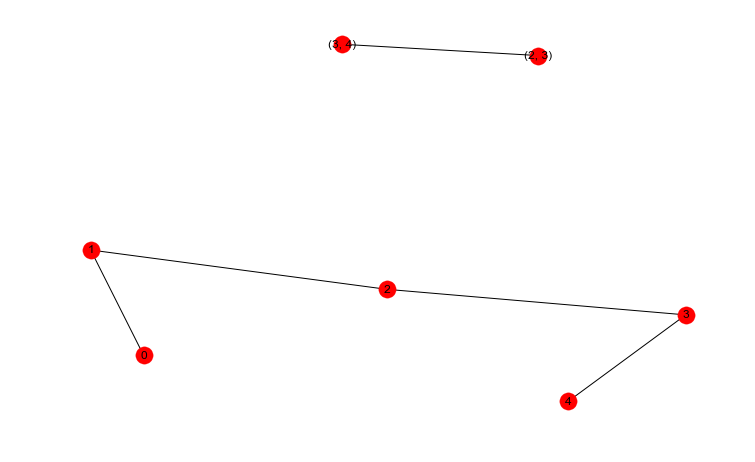

In [139]:
nx.draw(G, with_labels = True)
plt.show()

In [140]:
# adding a list of edges
G.add_edges_from([(1, 2),(1, 5)])

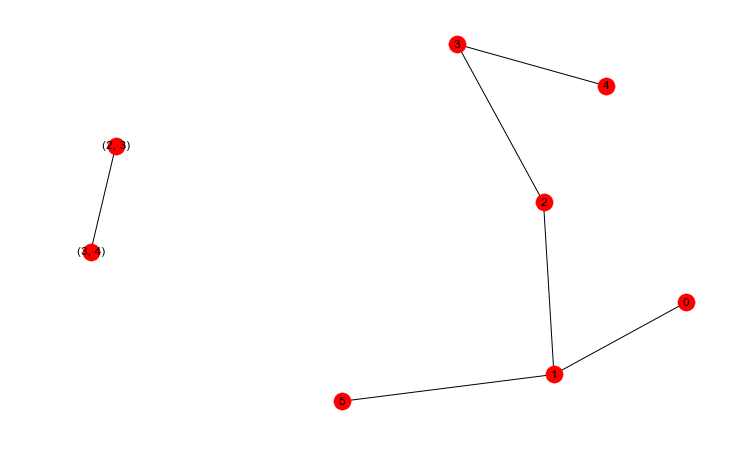

In [141]:
nx.draw(G, with_labels = True)
plt.show()

In [142]:
G.add_edges_from([(3,2),(4,3)])
G.add_node(7)
G.add_edge(7,2)
G.add_node('spam')       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'

In [143]:
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 7
Average degree:   1.0000


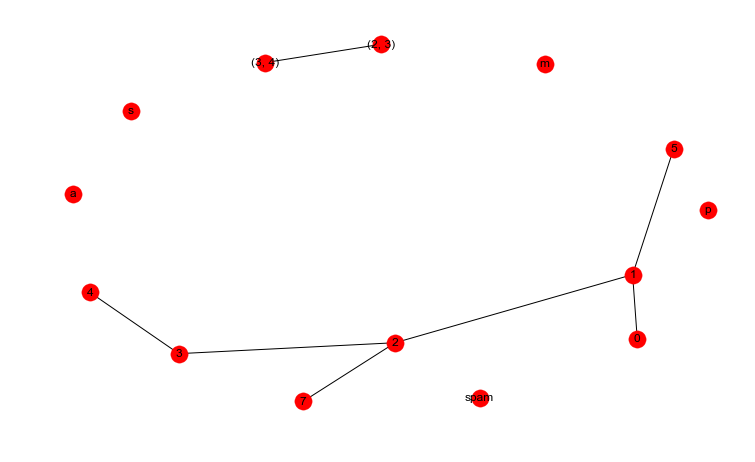

In [144]:
nx.draw(G, with_labels = True)
plt.show()

In [145]:
G.number_of_nodes()

14

In [146]:
G.number_of_edges()

7

In [147]:
list(G.nodes())

[1, 2, 3, 0, 4, (2, 3), (3, 4), 5, 7, 'spam', 's', 'p', 'a', 'm']

In [148]:
list(G.edges())

[(1, 2), (1, 0), (1, 5), (2, 3), (2, 7), (3, 4), ((2, 3), (3, 4))]

In [149]:
G[1][5]['color']='blue'

In [150]:
list(G.neighbors(1))

[2, 0, 5]

In [151]:
e0=G.edges()[0]
print (e0)

(1, 2)


In [152]:
G.remove_edge(e0[0],e0[1]) # G.remove_edge(1,0)

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 6
Average degree:   0.8571


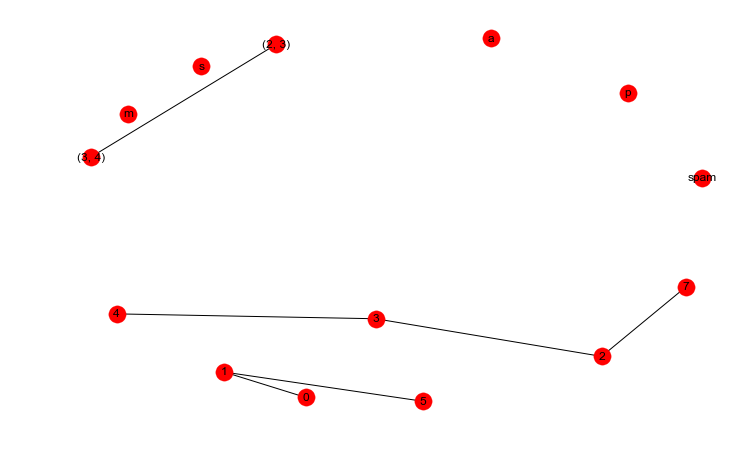

In [153]:
print (nx.info(G))
nx.draw(G, with_labels = True)
plt.show()

## Directed graph

In mathematics, and more specifically in graph theory, a directed graph (or digraph) is a graph that is a set of vertices connected by edges, where the edges have a direction associated with them.

In [154]:
D = nx.DiGraph(G)  # create a DiGraph using the connections from G

In [155]:
list(D.edges())

[(1, 0),
 (1, 5),
 (2, 3),
 (2, 7),
 (3, 2),
 (3, 4),
 (0, 1),
 (4, 3),
 ((2, 3), (3, 4)),
 ((3, 4), (2, 3)),
 (5, 1),
 (7, 2)]

In [156]:
print (nx.info(D))

Name: 
Type: DiGraph
Number of nodes: 14
Number of edges: 12
Average in degree:   0.8571
Average out degree:   0.8571


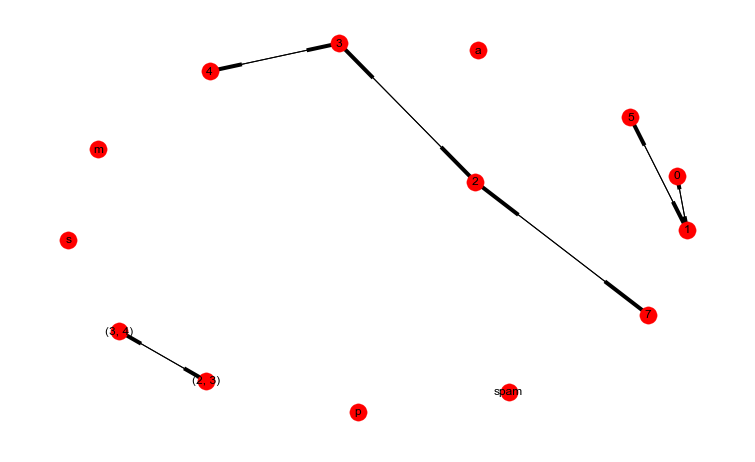

In [157]:
nx.draw(D, with_labels = True)
plt.show()

## Weighted graphs

A weighted graph is a graph in which each edge is given a numerical weight. A weighted graph is therefore a special type of labeled graph in which the labels are numbers.

In [158]:
WG = nx.Graph()

In [159]:
WG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75),  (1, 5, 3.3), (2 ,4 , 1.2), (3 ,4 , 0.375)])

In [160]:
print (nx.info(WG))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 5
Average degree:   2.0000


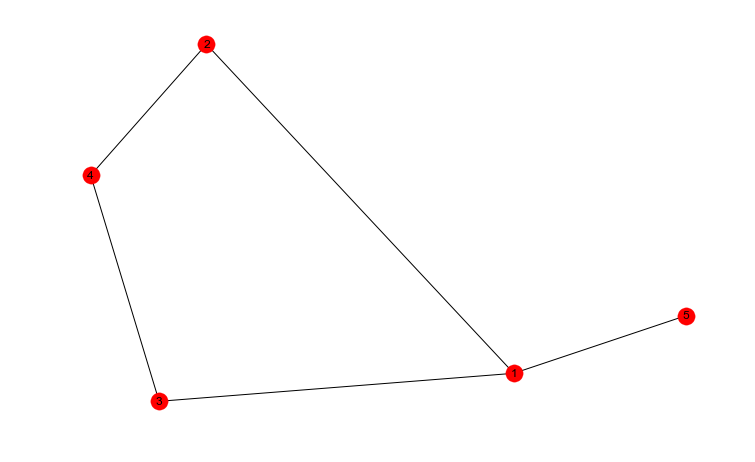

In [161]:
nx.draw(WG, with_labels = True)
plt.show()

In [162]:
G=nx.dodecahedral_graph()

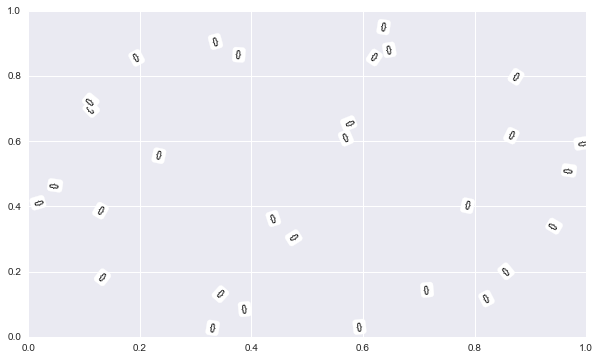

In [163]:
edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))

In [164]:
print (nx.info(G))

Name: Dodecahedral Graph
Type: Graph
Number of nodes: 20
Number of edges: 30
Average degree:   3.0000


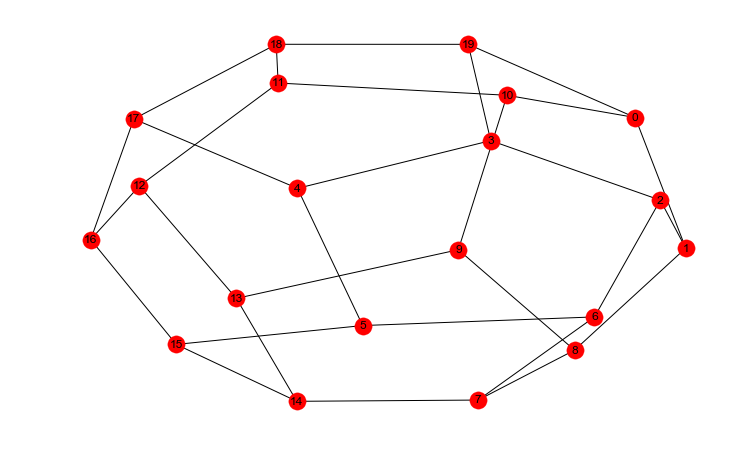

In [165]:
nx.draw(G, with_labels = True)
plt.show()

## Adding attributes to graphs, nodes, and edges

In [166]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [167]:
# you can modify attributes later
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

## Multigraphs

Multigraphs are graphs which allow multiple edges between any pair of nodes.

In [168]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [169]:
print (nx.info(MG))

Name: 
Type: MultiGraph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000


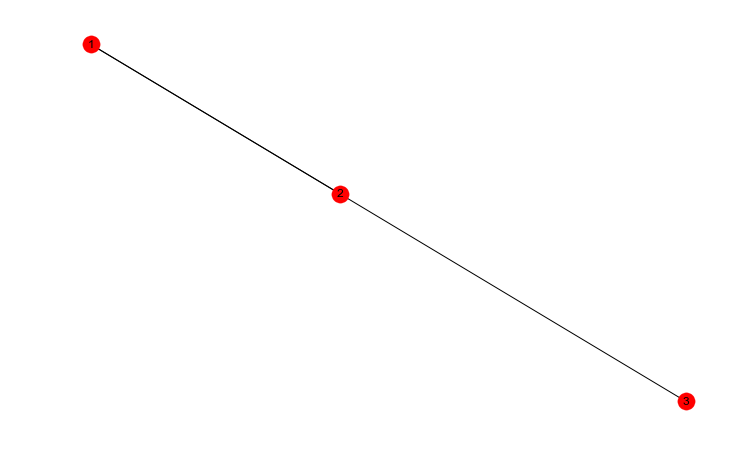

In [170]:
nx.draw(MG, with_labels = True)
plt.show()

## Graph generators and graph operations

Name: Tutte's Graph
Type: Graph
Number of nodes: 46
Number of edges: 69
Average degree:   3.0000


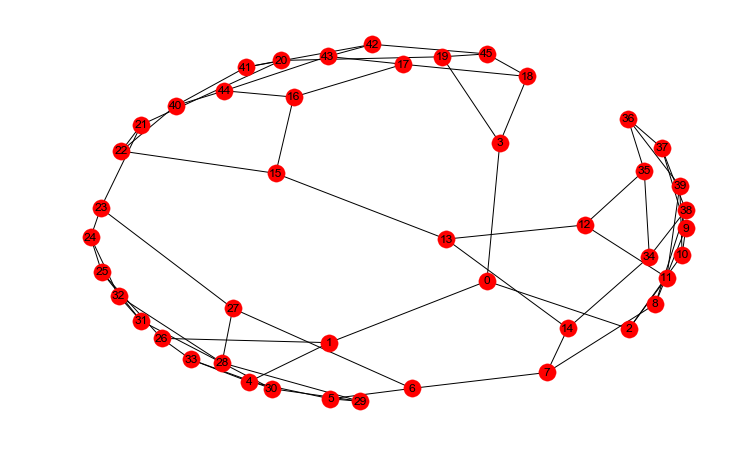

In [171]:
tutte = nx.tutte_graph()
print (nx.info(tutte))
nx.draw(tutte, with_labels = True)
plt.show()

Name: Sedgewick Maze
Type: Graph
Number of nodes: 8
Number of edges: 10
Average degree:   2.5000


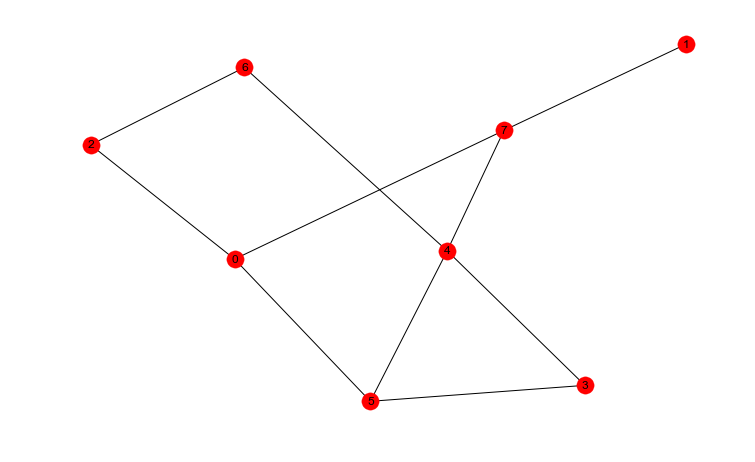

In [172]:
maze = nx.sedgewick_maze_graph()
print (nx.info(maze))
nx.draw(maze, with_labels = True)
plt.show()

Name: Platonic Tetrahedral graph
Type: Graph
Number of nodes: 4
Number of edges: 6
Average degree:   3.0000


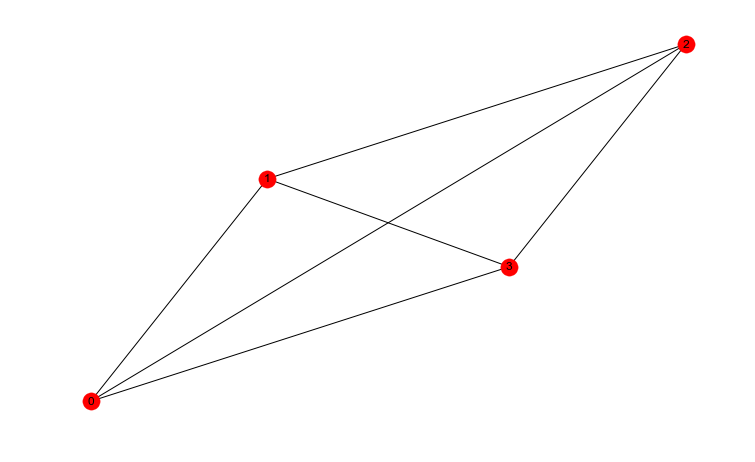

In [173]:
tet = nx.tetrahedral_graph()
print (nx.info(tet))
nx.draw(tet, with_labels = True)
plt.show()

Name: complete_graph(5)
Type: Graph
Number of nodes: 5
Number of edges: 10
Average degree:   4.0000


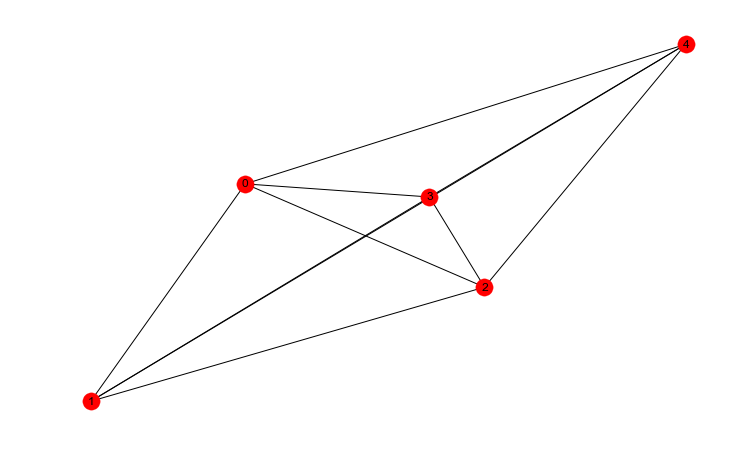

In [174]:
K_5 = nx.complete_graph(5)
print (nx.info(K_5))
nx.draw(K_5, with_labels = True)
plt.show()

Name: barbell_graph(10,10)
Type: Graph
Number of nodes: 30
Number of edges: 101
Average degree:   6.7333


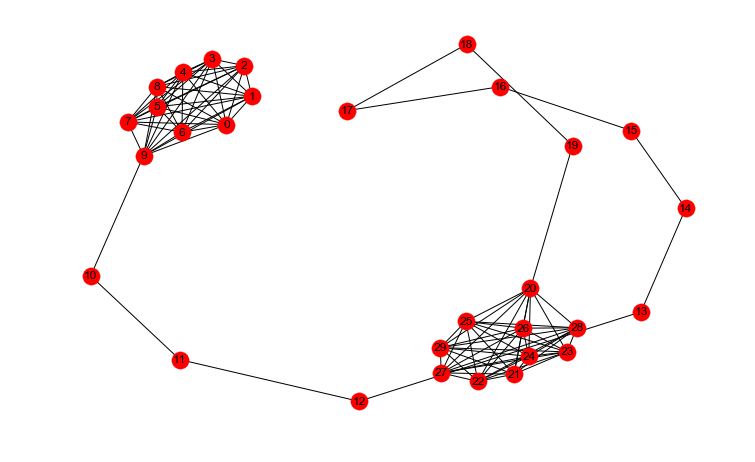

In [175]:
barbell = nx.barbell_graph(10, 10)
print (nx.info(barbell))
nx.draw(barbell, with_labels = True)
plt.show()

Name: lollipop_graph(10,20)
Type: Graph
Number of nodes: 30
Number of edges: 65
Average degree:   4.3333


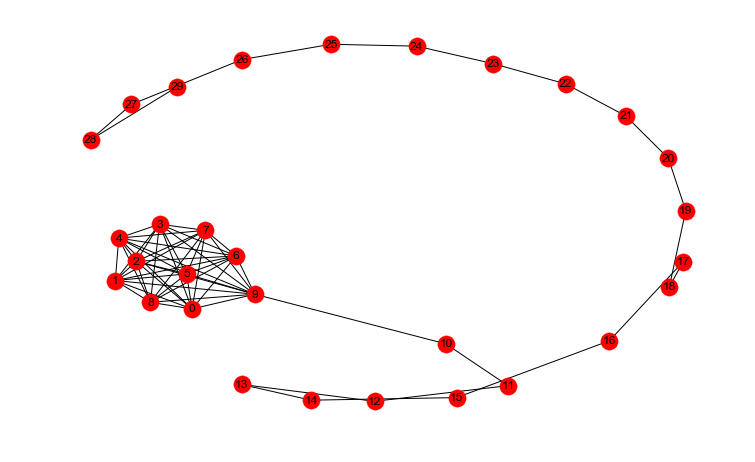

In [176]:
lollipop = nx.lollipop_graph(10, 20)
print (nx.info(lollipop))
nx.draw(lollipop, with_labels = True)
plt.show()

Name: watts_strogatz_graph(30,3,0.1)
Type: Graph
Number of nodes: 30
Number of edges: 30
Average degree:   2.0000


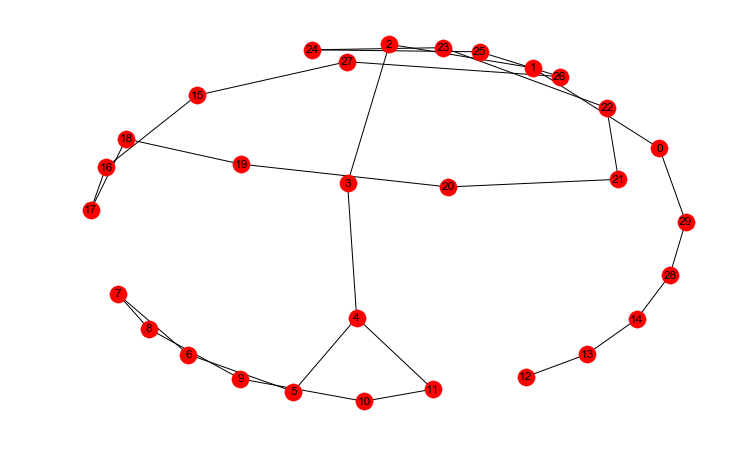

In [177]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
print (nx.info(ws))
nx.draw(ws, with_labels = True)
plt.show()

Name: barabasi_albert_graph(100,5)
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


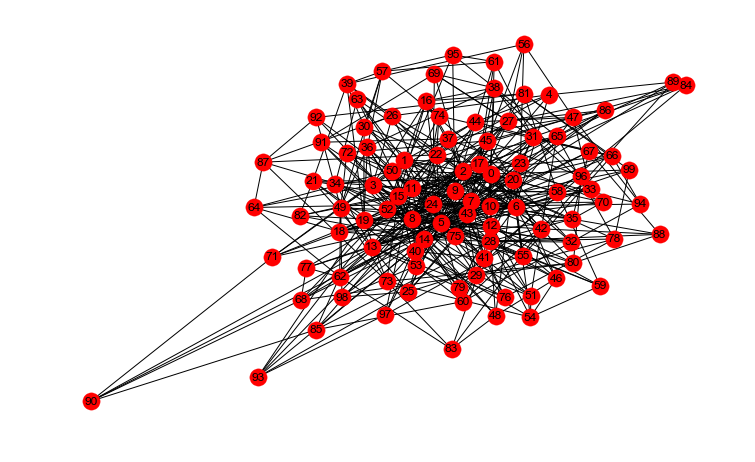

In [178]:
ba = nx.barabasi_albert_graph(100, 5)
print (nx.info(ba))
nx.draw(ba, with_labels = True)
plt.show()

Name: random_lobster(100,0.9,0.9)
Type: Graph
Number of nodes: 439
Number of edges: 438
Average degree:   1.9954


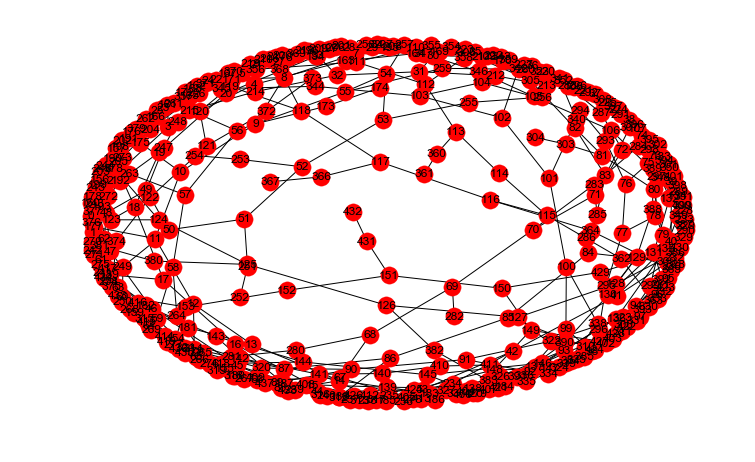

In [179]:
red = nx.random_lobster(100, 0.9, 0.9)
print (nx.info(red))
nx.draw(red, with_labels = True)
plt.show()

## What is a network?

A network is a graph. That is:

* A set of vertices (or nodes) joined by edges.  
* Vertices and edges can have properties (feature values).  
* Edges can have weights and be directed.   


![Graph](http://nikbearbrown.com/YouTube/MachineLearning/M12/Graph.png)
- Graph  

*Cut Sets*  


In graph theory, a [graph cut](https://en.wikipedia.org/wiki/Cut_(graph_theory)) is a partition of the vertices of a graph into two disjoint subsets. Any cut determines a cut-set, the set of edges that have one endpoint in each subset of the partition.


![Cut Set](http://nikbearbrown.com/YouTube/MachineLearning/M12/Graph_Cut_Set.png)   
- Cut Set   

*Directed graph (digraph)*  

Each edge is an ordered pair of vertices, to indicate direction
Lines become arrows.  

* The indegree of a vertex is the number of incoming edges   
* The outdegree of a vertex is the number of outgoing edges   

![Directed graph (digraph)](http://nikbearbrown.com/YouTube/MachineLearning/M12/Digraph.png)   
- Directed graph (digraph)   

*Paths and Connectivity*  

A path in an undirected graph G = (V, E) is a sequence P of nodes $v_1, v_2, …, v_{k-1}, v_k$ with the property that each consecutive pair $v_i, v_{i+1}$ is joined by an edge in E.

A path is simple if all nodes are distinct.

An undirected graph is connected if for every pair of nodes u and v, there is a path between u and v.

*Cycles*  

A cycle is a path $v_1, v_2, …, v_{k-1}, v_k$ in which $v_1 = v_k, k > 2$, and the first k-1 nodes are all distinct.
  
*Trees*    
  
An undirected graph is a tree if it is connected and does not contain a cycle.

  Theorem.  Let G be an undirected graph on n nodes. Any two of the following statements imply the third.
* G is connected.   
* G does not contain a cycle.     
* G has n-1 edges.    

*Rooted Trees*  

Rooted tree.  Given a tree T, choose a root node r and orient each edge away from r.

![Rooted tree](http://nikbearbrown.com/YouTube/MachineLearning/M12/Rooted_Binary_tree.png)   
- Rooted tree   

Importance.  Models hierarchical structure.


## Bipartite graphs

In graph theory, a [bipartite graph](https://en.wikipedia.org/wiki/Bipartite_graph) is a graph whose vertices can be divided into two disjoint sets and (that is, and are each independent sets) such that every edge connects a vertex in one disjoint set to one in in the other disjoint set. That is, there are only between set and no within set edges.   





In [180]:
K_3_5 = nx.complete_bipartite_graph(3, 5)

Name: complete_bipartite_graph(3,5)
Type: Graph
Number of nodes: 8
Number of edges: 15
Average degree:   3.7500


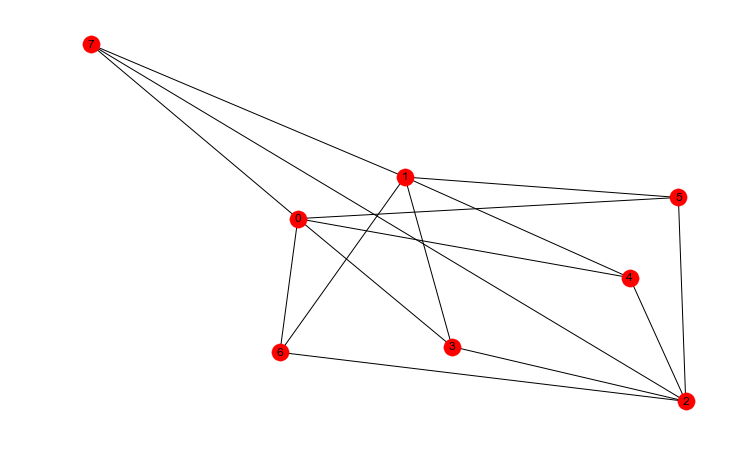

In [181]:
print (nx.info(K_3_5))
nx.draw(K_3_5, with_labels = True)
plt.show()

# Erdos-Renyi Random Graphs   

In graph theory, the [Erdos-Renyi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) is either of two closely related models for generating random graphs. They are named after Paul Erdős and Alfréd Rényi.  

![Erdos-Renyi model](http://nikbearbrown.com/YouTube/MachineLearning/M12/ER_model.png)   
- Erdos-Renyi model is generated with N = 4 nodes. from en.wikipedia.org/wiki/Network_science#/media/File:ER_model.png 

The G(n, M) model,
* n is the the number of vertices or nodes   
* M is the the number of edges
* 0 $\leq$ p $\leq$ 1
* for each pair (i,j), generate the edge (i,j) independently with probability p

Equivalently, all graphs with n nodes and M edges have equal probability of

$$
p^M (1-p)^{{n \choose 2}-M}.
$$

The parameter p in this model can be thought of as a weighting function; as p increases from 0 to 1, the model becomes more and more likely to include graphs with more edges and less and less likely to include graphs with fewer edges.

Random graphs degree distribution follows a binomial.
$$
P(\operatorname{deg}(v) = k) = {n-1\choose k}p^k(1-p)^{n-1-k},
$$
where n is the total number of vertices in the graph. Since

$$
P(\operatorname{deg}(v) = k) \to \frac{(np)^k \mathrm{e}^{-np}}{k!} \quad \mbox{ as } n \to \infty \mbox{ and } np = \mathrm{const},
$$

this distribution is Poisson for large n and np = const.


Name: gnp_random_graph(100,0.15)
Type: Graph
Number of nodes: 100
Number of edges: 723
Average degree:  14.4600


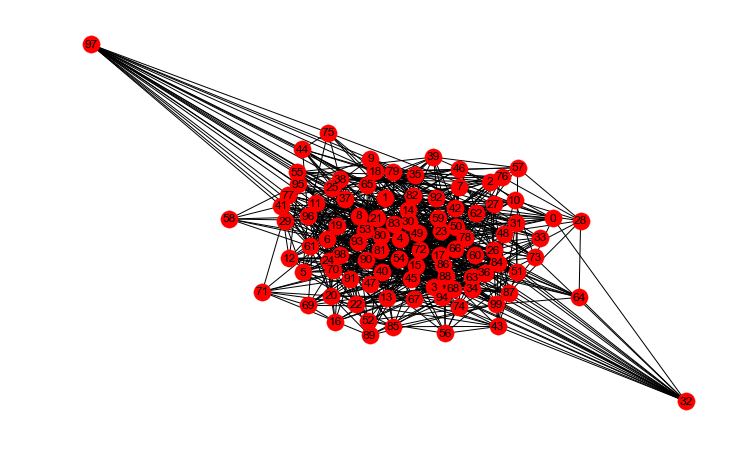

In [182]:
er = nx.erdos_renyi_graph(100, 0.15)
print (nx.info(er))
nx.draw(er, with_labels = True)
plt.show()

## Network Motifs

[Network motifs](https://en.wikipedia.org/wiki/Network_motif), are recurrent and statistically significant sub-graphs or patterns.  

**Analyzing graphs**

The structure of a graph can be analyzed using various graph-theoretic functions. For example, in graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

![3 connected components](http://nikbearbrown.com/YouTube/MachineLearning/IMG/540px-Pseudoforest.svg.png)

[3 connected components By David Eppstein - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=2838835)

In [183]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
G.add_edges_from([(4, 5), (5, 6)])
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}, {4, 5, 6}]

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 4
Average degree:   1.1429


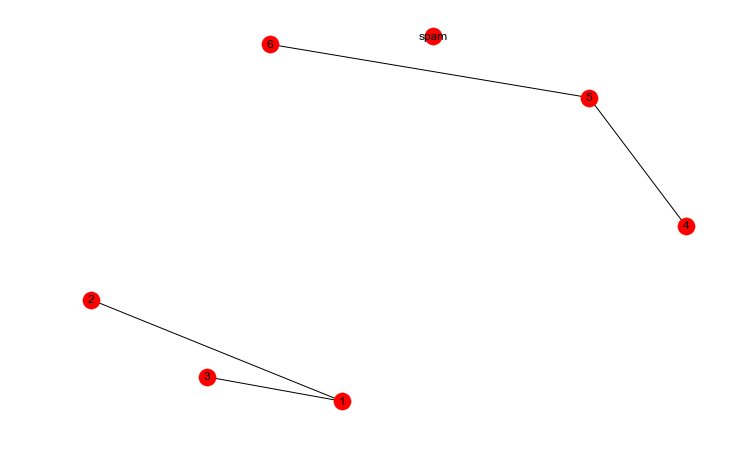

In [184]:
print (nx.info(G))
nx.draw(G, with_labels = True)
plt.show()

## Cliques  

A clique is a fully connected graph. A graph that has all possible n(n-1)/2 edges.

![Clique (graph theory)](http://nikbearbrown.com/YouTube/MachineLearning/M12/Clique_graph_theory.png)   

A graph with
* 23 x 1-vertex cliques (the vertices),
* 42 x 2-vertex cliques (the edges),
* 19 x 3-vertex cliques (the light and dark blue triangles), and
* 2 x 4-vertex cliques (just the dark blue areas).  

The 11 light blue triangles form maximal cliques. The two dark blue 4-cliques are both maximum and maximal, and the clique number of the graph is 4.

from [Clique (graph theory)](https://en.wikipedia.org/wiki/Clique_(graph_theory))   


## Diameter

The longest shortest path in the graph. In other words, a graph's diameter is the largest number of vertices which must be traversed in order to travel from one vertex to another when paths which backtrack, detour, or loop are excluded from consideration.


## Social network analysis (SNA)

[Social network analysis](https://en.wikipedia.org/wiki/Social_network_analysis) (SNA) is a strategy for investigating social structures through the use of network and graph theories.  

A social network is a social structure made of nodes (which are generally individuals or organizations) that are tied by one or more specific types of interdependency, such as values, visions, ideas, financial exchange, friends, kinship, dislike, conflict, trade, web, sexual relations, disease transmission.

![Social Networks](http://nikbearbrown.com/YouTube/MachineLearning/M12/Social_Networks_Talk.png)
*Social Networks*   



## The Strength of Weak Ties  

[Granovetter’s](https://en.wikipedia.org/wiki/Mark_Granovetter) “The Strength of Weak Ties” (considered one of the most important sociology papers written in recent decades with about 30,000 citations according to Google Scholar).  Granovetter argued that “weak ties” could actually be more advantageous in politics or in seeking employment than “strong ties”, because weak ties allowed an individual to reach a higher number of other individuals.
  


## Which nodes are important?

## SNA Metrics

Structural (quantitative)
* Size - Number of nodes.      
* Density - Number of ties that are present vs the amount of ties that could be present.     
* Diversity/Homophily - [Homophily](https://en.wikipedia.org/wiki/Homophily) (i.e., "love of the same") is the tendency of individuals to associate and bond with similar others.  
* Out-degree- Sum of connections from a node to others.    
* In-degree  - Sum of connections to a node.    
* Structural Holes - In the context of social networks, social capital exists where people have an advantage because of their location in a network. Most social structures tend to be characterized by dense clusters of strong connections. When two separate clusters possess non-redundant information, there is said to be a structural hole between them.     
* Isolates/Cliques - Highly connected subnodes.  
* Centrality - Nodes who have more ties to other nodes may be advantaged positions in social networks. Many ties provide redundancy and reachability. Centrak nodes have alternative ways to satisfy needs, and hence are less dependent on other individuals.  
* Betweeness - a hub, other nodes need to connect through the between node to connect to a desired node. Also called betweenness centrality (i.e. A number that represents how frequently a node is between other nodes geodesic paths.   
* Closeness - Average Path distance
* Closeness:  Reach (i.e. number of hops)
* Closeness: Geodesic distance - shortest path.
* Closeness centrality - Distance of one node to all others in the network.   
* Diameter - Maximum greatest least distance between any node and another.  
* Maximum flow - The amount of different nodes in the neighborhood of a source that lead to pathways to a target.  


Relational (qualitative) 
* Strength of ties
* Accessibility
* Likeability/”fun”
* Reputation
* Expected reciprocity? 
* Competing unit?
* Dependence
* Trust


## The Tipping Point

[The Tipping Point: How Little Things Can Make a Big Difference](https://en.wikipedia.org/wiki/The_Tipping_Point) is the debut book by Malcolm Gladwell, first published by Little Brown in 2000.

Malcolm Gladwell describes the "three rules of social epidemics", that is, how epidemics spread through social networks.  The three rules:  

1 The Law of the Few   

Gladwell theorizes that a few specialized nodes are needed for virality of a message.

Connectors are the people in a community who know large numbers of people and who are in the habit of making introductions. A connector is essentially the social equivalent of a computer network hub. 

Mavens are "information specialists", or "people we rely upon to connect us with new trusted information."  The represents authority and trust in new information.   


Salesmen are "persuaders", charismatic people with powerful negotiation skills. 

2 The Stickiness Fnode  

The specific content of a message that renders its impact memorable. 

3 The Power of Context  

Malcolm Gladwell says, "Epidemics are sensitive to the conditions and circumstances of the times and places in which they occur".   

## Centrality Measures

Local Centrality (Degree): The number of links an node has with other nodes.

* A potential sign of power.   
* High in-degree can be a sign of prominence or prestige.   
* High out-degree can be a sign of influence.  
* Betweeness: The degree to which an node is situated between two groups, and is a necessary route between those groups.  
nodes with high betweeness have the potential to have a major influence
* A node with high betweenness has great influence over what flows in the  network indicating important links and single point of failure.   
* They can be mediators/brokers, gatekeepers, bottlenecks, or obstacles to communication.
* They are especially valuable when the link two diverse groups.  

Global Centrality (Closeness): the average distance between an node and all other nodes in a network.  

* Most likely to be “in the know” about what is happening

## Small world phenomena

The small-world experiment comprised several experiments conducted by Stanley Milgram and other researchers examining the average path length for social networks of people in the United States. Letters were handed out to people in Nebraska to be sent to a target in Boston. People were instructed to pass on the letters to someone they knew on first-name basis
The letters that reached the destination followed paths of length around six. The experiments are often associated with the phrase "six degrees of separation", although Milgram did not use this term himself.  

See [Small world project](http://smallworld.columbia.edu/index.html)   

## Measuring the Small World Phenomenon

Diameter - The longest shortest path in the graph.  In other words, once the shortest path length from every node to all other nodes is calculated, the diameter is the longest of all the calculated path lengths.

Characteristic (Average) path length - Average path length is calculated by finding the shortest path between all pairs of nodes, adding them up, and then dividing by the total number of pairs. This shows us, on average, the number of steps it takes to get from one member of the network to another.  

Harmonic mean - In mathematics, the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) is one of several kinds of average, and in particular one of the Pythagorean means. The harmonic mean H of the positive real numbers $x_1, x_2, ..., x_n$ is defined to be  

$$
H = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + \cdots + \frac{1}{x_n}} = \frac{n}{\sum_{i=1}^n \frac{1}{x_i}} = \frac{n \cdot \prod_{j=1}^n x_j }{ \sum_{i=1}^n \frac{\prod_{j=1}^n x_j}{x_i}}.
$$

From the third formula in the above equation, it is more apparent that the harmonic mean is related to the [arithmetic](https://en.wikipedia.org/wiki/Arithmetic_mean) and [geometric](https://en.wikipedia.org/wiki/Geometric_mean) means.

## Clustering Coefficient  

In graph theory, a clustering coefficient is a measure of degree to which nodes in a graph tend to cluster together. 

Clustering Coefficients were introduced by Watts & Strogatz in 1998, as a way to measure how close a node (or vertex) and its neighbors are from being a clique, or a complete graph within a larger graph or network.

Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties.


## Mixing patterns   

Assume that we have various types of nodes. What is the probability that two nodes of different type are linked? Social networks tend to be "Birds of a Feather." Homophily limits people's social worlds in a way that has powerful implications for the information they receive, the attitudes they form, and the interactions they experience.

Individuals in homophilic relationships share common characteristics (beliefs, values, education, etc.) that make communication and relationship formation easier. The opposite of homophily is heterophily.  


In [185]:
G_fb = nx.read_edgelist('data/facebook_G.txt', create_using = nx.Graph(), nodetype = int)

In [186]:
#Quick snapshot of the Network
print (nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [187]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

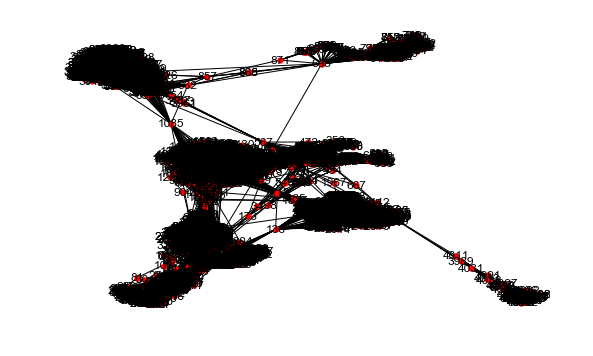

In [188]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = True, node_size = 35)

## Betweenness Centrality

In [189]:
from multiprocessing import Pool
import itertools

In [190]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [191]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [192]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

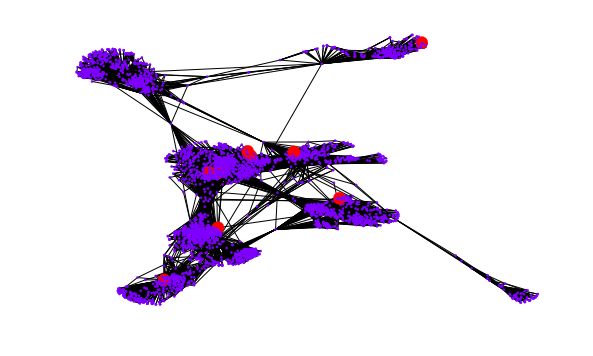

In [193]:
bt = between_parallel(G_fb)
top = 10

max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

## Community Detection

In [194]:
import community

In [195]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

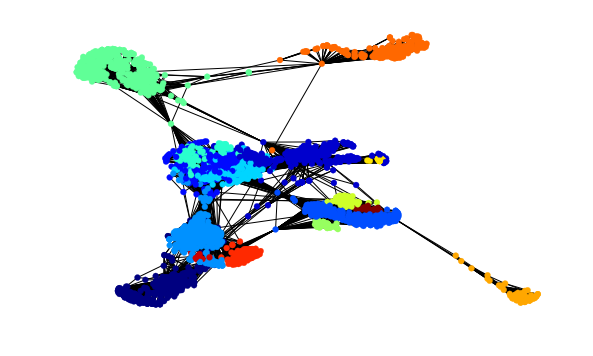

In [196]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

Last update September 22, 2017